# **모델 개발 및 평가**

In [59]:
# <선형회귀모델>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston # 보스턴 집 값 가져오기

sns.set(style="ticks", color_codes=True) # 테마(기본값: darkgrid) 
plt.rcParams['figure.figsize'] = (8, 5)  # 그래프 사이즈(가로,세로)
plt.rcParams['figure.dpi'] = 80 # 해상도(기본값: 100)

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%209/Boston.csv")

In [8]:
print(df.keys())

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
print(df.columns)

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [11]:
print(df.head())

      CRIM   ZN   INDUS   CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0  0.00632  18.0    2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0    7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0    7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0    2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0    2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]


In [12]:
df.isna().sum() # 결측값 False의 합계 확인

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

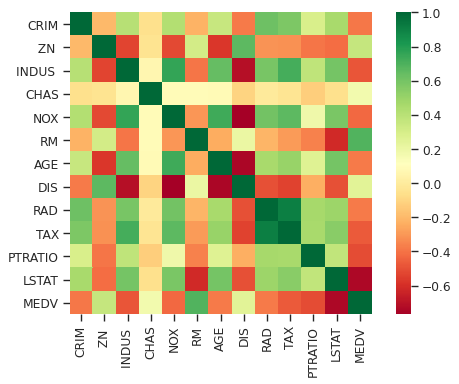

In [60]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn') # 상관분석: MEDV와 RM은 양의 상관관계임을 확인 가능

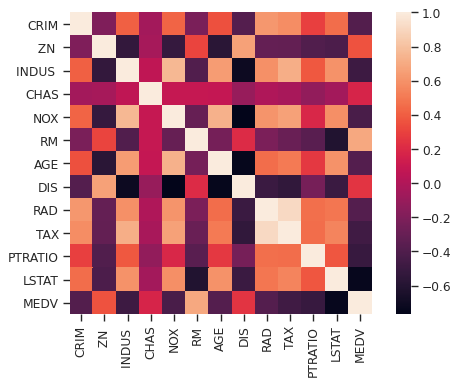

In [61]:
sns.heatmap(df.corr(), square=True)

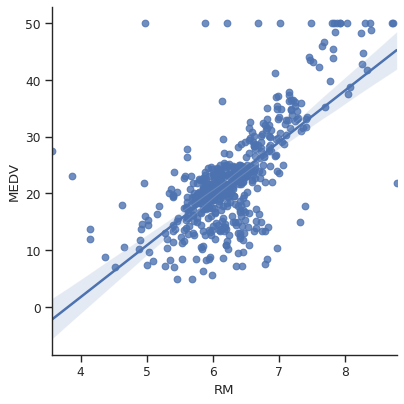

In [62]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df) # 데이터셋의 분포와 회귀선 출력

In [64]:
# 입력(독립변수)과 레이블(목표변수) 설정하기
X = df[['RM']]
y = df[['MEDV']]

# 학습 데이터셋과 테스트 데이터셋 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 테스트 30%, 난수생성을 위한 튜닝 값 10

# 알고리즘 지정하기
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# 학습데이터를 모델에 맞추기
regressor.fit(X_train, y_train)

# 테스트 데이터로 예측 정확도 확인하기
regressor.score(X_test, y_test)

0.5383003344910231

In [65]:
# 평가하기
y_pred=regressor.predict(X_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10) # 실제값과 예측값 표

,Actual,Predicted
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
5,14.3,23.569336
6,50.0,32.839084
7,14.3,16.535597
8,20.7,19.026896
9,37.6,37.689635


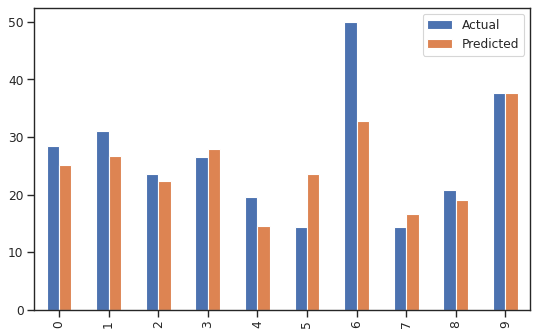

In [66]:
evaluate.head(10).plot(kind='bar') # 실제값과 예측값의 차이에 대한 막대 그래프

In [79]:
# 스코어링 모델 불러오기
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print(f"R2 score: {r2_score(y_test, y_pred)}") # R2 score(결정계수, 0~1사이)
print(f"MSE score: {mean_absolute_error(y_test, y_pred)}") # 평균절대오차
print(f"MSE score: {mean_squared_error(y_test, y_pred)}") # 평균제곱오차

R2 score: 0.5383003344910231
MSE score: 4.750294229575126
MSE score: 45.0773394247183


In [81]:
# <다중선형회귀모델> * sklearn을 이용할 때, 단순선형회귀모델과 큰 차이가 없음. 

# 입력(독립변수)과 레이블(목표변수) 설정하기
X = df[['LSTAT', 'CRIM', 'NOX', 'TAX', 'PTRATIO', 'CHAS', 'DIS']]
y = df[['MEDV']]

# 학습 데이터셋과 테스트 데이터셋 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 학습데이터를 모델에 맞추기
regressor.fit(X_train, y_train)

# 테스트 데이터로 예측 정확도 확인하기
regressor.score(X_test, y_test)

0.6446942534265363

In [83]:
y_pred=regressor.predict(X_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10) # 실제값과 예측값 표

,Actual,Predicted
0,28.4,27.445779
1,31.1,31.364849
2,23.5,30.681874
3,26.6,22.143726
4,19.6,23.063037
5,14.3,16.421246
6,50.0,36.733894
7,14.3,15.887917
8,20.7,25.718492
9,37.6,32.816198


In [31]:
# 다른 다중선형회귀모델 실습
X = df[['LSTAT', 'CRIM', 'NOX', 'TAX', 'PTRATIO']]
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.5798770784084717